In [40]:
from keras.datasets import mnist
#from keras.utils import np_utils
from tensorflow.python.keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [4]:
(x_Train,y_Train),(x_Test,y_Test)=mnist.load_data()

In [5]:
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

In [6]:
x_Train4D_normalize = x_Train4D/255
x_Test4D_normalize = x_Test4D/255

In [7]:
#np_utils.to_categoricaly
from keras.src.utils.np_utils import to_categorical as tc
y_TrainOneHot=np_utils.to_categorical(y_Train)
y_TestOneHot=tc(y_Test)

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [10]:
model = Sequential()

model.add(Conv2D(filters=16,
                kernel_size=(5,5),
                padding='same',
                input_shape=(28,28,1),
                activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

In [13]:
model.add(Conv2D(filters=36,
                      kernel_size=(5,5),
                      padding='same',
                      activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [14]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',metrics=['accuracy'])

In [16]:
train_history=model.fit(x=x_Train4D_normalize,
                       y=y_TrainOneHot,validation_split=0.2,
                       epochs=10, batch_size=300,verbose=2)

Epoch 1/10
160/160 - 12s - loss: 0.4163 - accuracy: 0.8664 - val_loss: 0.0800 - val_accuracy: 0.9749 - 12s/epoch - 78ms/step
Epoch 2/10
160/160 - 12s - loss: 0.1125 - accuracy: 0.9663 - val_loss: 0.0517 - val_accuracy: 0.9844 - 12s/epoch - 78ms/step
Epoch 3/10
160/160 - 13s - loss: 0.0797 - accuracy: 0.9756 - val_loss: 0.0439 - val_accuracy: 0.9873 - 13s/epoch - 82ms/step
Epoch 4/10
160/160 - 15s - loss: 0.0617 - accuracy: 0.9816 - val_loss: 0.0407 - val_accuracy: 0.9883 - 15s/epoch - 93ms/step
Epoch 5/10
160/160 - 16s - loss: 0.0495 - accuracy: 0.9848 - val_loss: 0.0355 - val_accuracy: 0.9889 - 16s/epoch - 102ms/step
Epoch 6/10
160/160 - 17s - loss: 0.0448 - accuracy: 0.9868 - val_loss: 0.0326 - val_accuracy: 0.9907 - 17s/epoch - 107ms/step
Epoch 7/10
160/160 - 17s - loss: 0.0422 - accuracy: 0.9871 - val_loss: 0.0300 - val_accuracy: 0.9910 - 17s/epoch - 109ms/step
Epoch 8/10
160/160 - 18s - loss: 0.0345 - accuracy: 0.9896 - val_loss: 0.0283 - val_accuracy: 0.9915 - 18s/epoch - 111ms/s

In [17]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'], loc='upper left')
    plt.show()

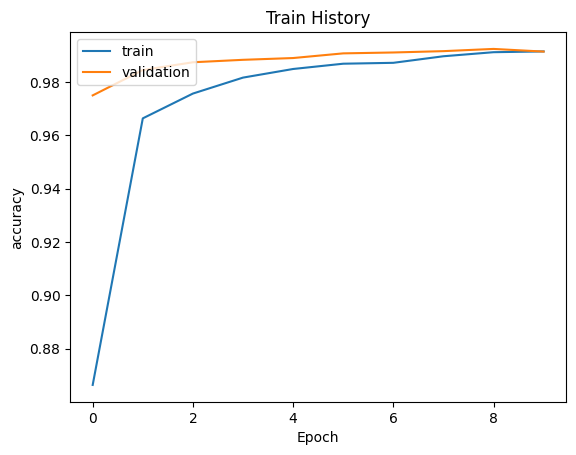

In [18]:
show_train_history(train_history,'accuracy','val_accuracy')

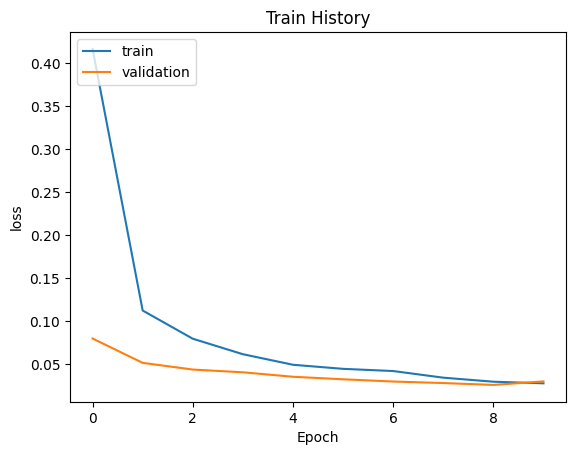

In [19]:
show_train_history(train_history,'loss','val_loss')

In [20]:
scores = model.evaluate(x_Test4D_normalize,y_TestOneHot)
scores[1]

313/313 [==============================] - 1s 3ms/step - loss: 0.0207 - accuracy: 0.9934


0.993399977684021

In [34]:
#prediction = model.predict(x_Test4D_normalize)
#prediction = (model.predict(x_Test4D_normalize) > 0.5).astype("int32")
#prediction = np.round(prediction)
#https://stackoverflow.com/questions/68836551/keras-attributeerror-sequential-object-has-no-attribute-predict-classes
prediction = np.argmax(model.predict(x_Test4D_normalize),axis=1)

313/313 [==============================] - 1s 3ms/step


In [35]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [38]:
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig=plt.gcf()
    fig.set_size_inches(12,14)
    if num>25:num=25
    for i in range(0,num):
        ax=plt.subplot(5,5,i+1)
        ax.imshow(images[idx], cmap='binary')
        title='label' + str(labels[idx])
        if len(prediction)>0:
            title+=',predict='+str(prediction[idx])
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    #plt.imshow(image,cmap='binary')
    plt.show()

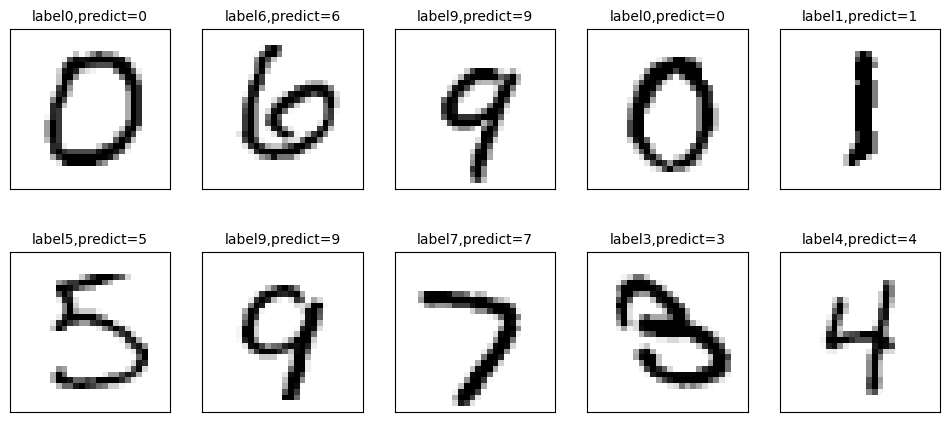

In [39]:
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=10)

In [41]:
import pandas as pd
pd.crosstab(y_Test,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,976,0,0,0,0,0,1,2,1,0
1,0,1131,1,0,0,0,1,1,1,0
2,0,0,1027,1,0,0,0,2,2,0
3,0,0,0,1006,0,2,0,1,1,0
4,0,0,0,0,978,0,0,2,0,2
5,2,0,0,4,0,883,1,1,1,0
6,2,1,0,0,2,1,952,0,0,0
7,0,2,2,1,0,0,0,1021,1,1
8,0,0,0,2,0,0,0,1,970,1
